In [1]:
import pandas as pd
before_df = pd.read_json('before.json', lines=True)
before_df.head()

,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,moral_values.ACHIEVEMENT,moral_values.FEELING-GOOD,moral_values.FORGIVING,moral_values.ACCEPTING-OTHERS,moral_values.GRATITUDE,moral_values.OPTIMISM,moral_values.HONESTY,moral_values.SOCIETY,moral_values.RESPECT,moral_values.LIFE
0,1321240211175677952,2020-10-27 23:59:48+00:00,RT @MeidasTouch: 📺 NEW VIDEO America needs ...,nurseyboy1 (nurseyboy),0.039843,0.018855,0.017909,0.110531,0.027466,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1321240200199233536,2020-10-27 23:59:45+00:00,#SaveAmerica #VoteBidenHarrisToSaveAmerica2020...,FiscalConserva (trump Virus still Killing Us),0.050691,0.037530,0.016614,0.083217,0.042559,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1321240101272379392,2020-10-27 23:59:22+00:00,RT @MeidasTouch: 📺 NEW VIDEO America needs ...,nokkkusa (NewDawn DON'T BE A MASKHOLE),0.039843,0.018855,0.017909,0.110531,0.027466,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1321240093240295424,2020-10-27 23:59:20+00:00,@Julius_S_Malema @MbuyiseniNdlozi We have to r...,angoni_SA (Mark),0.026853,0.184329,0.010633,0.386941,0.029954,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1321240077654282240,2020-10-27 23:59:16+00:00,RT @BradBeauregardJ: Trump is a coward and he ...,nancywa31371553 (nancy watson),0.004510,0.492834,0.009752,0.465055,0.005962,0.0,...,0,0,0,0,0,0,0,0,0,0


## Dropping RT tweets

In [2]:
beforeNoRT_df = before_df[~before_df['text'].str.contains("RT")].copy()

beforeNoRT_df.columns

Index(['id', 'created_at', 'text', 'author_id', 'emotion.joy', 'emotion.anger',
       'emotion.sadness', 'emotion.disgust', 'emotion.fear', 'liwc.focuspast',
       'liwc.focuspresent', 'liwc.focusfuture', 'liwc.posemo', 'liwc.negemo',
       'liwc.anx', 'liwc.anger', 'liwc.sad', 'liwc.family', 'liwc.friend',
       'liwc.female', 'liwc.male', 'liwc.social', 'liwc.affliation',
       'liwc.achieve', 'liwc.power', 'liwc.reward', 'liwc.risk',
       'moral_values.FUTURE', 'moral_values.ORDER', 'moral_values.JUSTICE',
       'moral_values.SECURITY', 'moral_values.ACHIEVEMENT',
       'moral_values.FEELING-GOOD', 'moral_values.FORGIVING',
       'moral_values.ACCEPTING-OTHERS', 'moral_values.GRATITUDE',
       'moral_values.OPTIMISM', 'moral_values.HONESTY', 'moral_values.SOCIETY',
       'moral_values.RESPECT', 'moral_values.LIFE'],
      dtype='object')

## Evaluate 0 values on focus and remove

In [3]:
beforeNoRT_df['focus'] = beforeNoRT_df.loc[:,beforeNoRT_df.columns.str.startswith("liwc.focus")].sum(axis=1)

beforeNoRT_df

,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,moral_values.FEELING-GOOD,moral_values.FORGIVING,moral_values.ACCEPTING-OTHERS,moral_values.GRATITUDE,moral_values.OPTIMISM,moral_values.HONESTY,moral_values.SOCIETY,moral_values.RESPECT,moral_values.LIFE,focus
1,1321240200199233536,2020-10-27 23:59:45+00:00,#SaveAmerica #VoteBidenHarrisToSaveAmerica2020...,FiscalConserva (trump Virus still Killing Us),0.050691,0.037530,0.016614,0.083217,0.042559,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
3,1321240093240295424,2020-10-27 23:59:20+00:00,@Julius_S_Malema @MbuyiseniNdlozi We have to r...,angoni_SA (Mark),0.026853,0.184329,0.010633,0.386941,0.029954,0.0,...,0,0,0,0,0,0,0,0,0,0.062500
8,1321239727476035584,2020-10-27 23:57:53+00:00,#SaveAmerica #SaveAmericaVOTEBLUE https://t....,Fabber13 (Fabber),0.038399,0.279464,0.020800,0.244354,0.042901,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
11,1321239573456953344,2020-10-27 23:57:16+00:00,#SaveAmerica https://t.co/gJNpr9vETg,Sammypooh13 (Samantha✊45446🇺🇸),0.091695,0.051132,0.031691,0.066464,0.104644,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
20,1321239291733938176,2020-10-27 23:56:09+00:00,#SaveAmerica https://t.co/HxCFDLy66Z,CarmenMigdali11 (Carmen Migdalia),0.091695,0.051132,0.031691,0.066464,0.104644,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417805,1323052328275087360,2020-11-02 00:00:30+00:00,@RepMcGovern My plan is to vote in person beca...,DMartel12 (David Martel),0.076255,0.009503,0.015324,0.072531,0.021194,0.0,...,0,0,0,0,0,0,0,0,0,0.111111
417819,1323052242799386624,2020-11-02 00:00:10+00:00,@erinrose1998 Forget the fact that Trump scamm...,10_1Sniffles (Taylor Mechling),0.005434,0.158648,0.009043,0.748859,0.007678,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
417820,1323052236906340352,2020-11-02 00:00:09+00:00,@LarrySchweikart Voter fraud in PA!,justingshelton (Justin Shelton),0.016939,0.079829,0.036269,0.464652,0.051918,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
417821,1323052234058485760,2020-11-02 00:00:08+00:00,Voter Fraud Scheme Registering Dead Democrats ...,GLHomeWatch (Jennifer Frost),0.018307,0.032373,0.018100,0.367459,0.052450,0.0,...,0,0,0,0,0,0,0,0,0,0.000000


In [4]:
beforeNoRT_with_focus = beforeNoRT_df[beforeNoRT_df['focus']>0].copy()

## Evaluate 0 values on moral values and remove

In [5]:
beforeNoRT_df['moral'] = beforeNoRT_df.loc[:,beforeNoRT_df.columns.str.startswith("moral_values")].sum(axis=1)

beforeNoRT_df

,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,moral_values.FORGIVING,moral_values.ACCEPTING-OTHERS,moral_values.GRATITUDE,moral_values.OPTIMISM,moral_values.HONESTY,moral_values.SOCIETY,moral_values.RESPECT,moral_values.LIFE,focus,moral
1,1321240200199233536,2020-10-27 23:59:45+00:00,#SaveAmerica #VoteBidenHarrisToSaveAmerica2020...,FiscalConserva (trump Virus still Killing Us),0.050691,0.037530,0.016614,0.083217,0.042559,0.0,...,0,0,0,0,0,0,0,0,0.000000,0
3,1321240093240295424,2020-10-27 23:59:20+00:00,@Julius_S_Malema @MbuyiseniNdlozi We have to r...,angoni_SA (Mark),0.026853,0.184329,0.010633,0.386941,0.029954,0.0,...,0,0,0,0,0,0,0,0,0.062500,0
8,1321239727476035584,2020-10-27 23:57:53+00:00,#SaveAmerica #SaveAmericaVOTEBLUE https://t....,Fabber13 (Fabber),0.038399,0.279464,0.020800,0.244354,0.042901,0.0,...,0,0,0,0,0,0,0,0,0.000000,0
11,1321239573456953344,2020-10-27 23:57:16+00:00,#SaveAmerica https://t.co/gJNpr9vETg,Sammypooh13 (Samantha✊45446🇺🇸),0.091695,0.051132,0.031691,0.066464,0.104644,0.0,...,0,0,0,0,0,0,0,0,0.000000,0
20,1321239291733938176,2020-10-27 23:56:09+00:00,#SaveAmerica https://t.co/HxCFDLy66Z,CarmenMigdali11 (Carmen Migdalia),0.091695,0.051132,0.031691,0.066464,0.104644,0.0,...,0,0,0,0,0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417805,1323052328275087360,2020-11-02 00:00:30+00:00,@RepMcGovern My plan is to vote in person beca...,DMartel12 (David Martel),0.076255,0.009503,0.015324,0.072531,0.021194,0.0,...,0,0,0,0,0,0,0,0,0.111111,0
417819,1323052242799386624,2020-11-02 00:00:10+00:00,@erinrose1998 Forget the fact that Trump scamm...,10_1Sniffles (Taylor Mechling),0.005434,0.158648,0.009043,0.748859,0.007678,0.0,...,0,0,0,0,0,0,0,0,0.000000,0
417820,1323052236906340352,2020-11-02 00:00:09+00:00,@LarrySchweikart Voter fraud in PA!,justingshelton (Justin Shelton),0.016939,0.079829,0.036269,0.464652,0.051918,0.0,...,0,0,0,0,0,0,0,0,0.000000,0
417821,1323052234058485760,2020-11-02 00:00:08+00:00,Voter Fraud Scheme Registering Dead Democrats ...,GLHomeWatch (Jennifer Frost),0.018307,0.032373,0.018100,0.367459,0.052450,0.0,...,0,0,0,0,0,0,0,0,0.000000,0


In [6]:
beforeNoRT_with_moral = beforeNoRT_df[beforeNoRT_df['moral']>0].copy()

beforeNoRT_with_moral

,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,moral_values.FORGIVING,moral_values.ACCEPTING-OTHERS,moral_values.GRATITUDE,moral_values.OPTIMISM,moral_values.HONESTY,moral_values.SOCIETY,moral_values.RESPECT,moral_values.LIFE,focus,moral


Moral value column seems to be mostly empty
Might be good to just drop them

In [7]:
beforeNoRT_df['posneg'] = beforeNoRT_df.loc[:,beforeNoRT_df.columns.str.endswith("emo")].sum(axis=1)

beforeNoRT_df_with_posneg = beforeNoRT_df[beforeNoRT_df['posneg']>0].copy()

beforeNoRT_df_with_posneg

,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,moral_values.ACCEPTING-OTHERS,moral_values.GRATITUDE,moral_values.OPTIMISM,moral_values.HONESTY,moral_values.SOCIETY,moral_values.RESPECT,moral_values.LIFE,focus,moral,posneg
3,1321240093240295424,2020-10-27 23:59:20+00:00,@Julius_S_Malema @MbuyiseniNdlozi We have to r...,angoni_SA (Mark),0.026853,0.184329,0.010633,0.386941,0.029954,0.000000,...,0,0,0,0,0,0,0,0.062500,0,0.187500
62,1321238234555424768,2020-10-27 23:51:57+00:00,@realDonaldTrump @kramerreport Mr. President ...,gambler1647 (Fran Butkiewicz),0.433079,0.011416,0.008592,0.026813,0.014164,0.000000,...,0,0,0,0,0,0,0,0.000000,0,0.166667
68,1321238008792797184,2020-10-27 23:51:03+00:00,The dissonance is strong with this one. #S...,3LeggedCouch (Three Legged Couch),0.005420,0.098832,0.012093,0.812772,0.007206,0.000000,...,0,0,0,0,0,0,0,0.000000,0,0.142857
98,1321237354242207744,2020-10-27 23:48:27+00:00,Iowa: vote. Vote like you have never voted bef...,erubio_p (Enrique Rubio),0.266907,0.007849,0.014483,0.027961,0.020272,0.043478,...,0,0,0,0,0,0,0,0.043478,0,0.086957
113,1321236969687445504,2020-10-27 23:46:55+00:00,@turboj67 @AmericaFirst_DT @POTUS He will defi...,peanutweet (peanut),0.021672,0.010799,0.017449,0.175937,0.028793,0.000000,...,0,0,0,0,0,0,0,0.142857,0,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417798,1323052356750123008,2020-11-02 00:00:37+00:00,"""Joe Biden Tells Voters: “I Don’t Need You to ...",godblesstheusa5 (silentnomore),0.016926,0.020885,0.012755,0.291235,0.031070,0.000000,...,0,0,0,0,0,0,0,0.000000,0,0.083333
417802,1323052336143429632,2020-11-02 00:00:32+00:00,@MeghanMcCain Your a nut plus that Trump isn...,DonGibs22787443 (DandyDon #KAG 🇺🇸 #MagaVeteran),0.013379,0.043429,0.016467,0.421970,0.067991,0.000000,...,0,0,0,0,0,0,0,0.200000,0,0.100000
417805,1323052328275087360,2020-11-02 00:00:30+00:00,@RepMcGovern My plan is to vote in person beca...,DMartel12 (David Martel),0.076255,0.009503,0.015324,0.072531,0.021194,0.000000,...,0,0,0,0,0,0,0,0.111111,0,0.166667
417819,1323052242799386624,2020-11-02 00:00:10+00:00,@erinrose1998 Forget the fact that Trump scamm...,10_1Sniffles (Taylor Mechling),0.005434,0.158648,0.009043,0.748859,0.007678,0.000000,...,0,0,0,0,0,0,0,0.000000,0,0.105263


In [9]:
merged_posneg_focus = pd.merge(beforeNoRT_df_with_posneg, beforeNoRT_with_focus)

merged_posneg_focus

,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,moral_values.ACCEPTING-OTHERS,moral_values.GRATITUDE,moral_values.OPTIMISM,moral_values.HONESTY,moral_values.SOCIETY,moral_values.RESPECT,moral_values.LIFE,focus,moral,posneg
0,1321240093240295424,2020-10-27 23:59:20+00:00,@Julius_S_Malema @MbuyiseniNdlozi We have to r...,angoni_SA (Mark),0.026853,0.184329,0.010633,0.386941,0.029954,0.000000,...,0,0,0,0,0,0,0,0.062500,0,0.187500
1,1321237354242207744,2020-10-27 23:48:27+00:00,Iowa: vote. Vote like you have never voted bef...,erubio_p (Enrique Rubio),0.266907,0.007849,0.014483,0.027961,0.020272,0.043478,...,0,0,0,0,0,0,0,0.043478,0,0.086957
2,1321236969687445504,2020-10-27 23:46:55+00:00,@turboj67 @AmericaFirst_DT @POTUS He will defi...,peanutweet (peanut),0.021672,0.010799,0.017449,0.175937,0.028793,0.000000,...,0,0,0,0,0,0,0,0.142857,0,0.142857
3,1321235612419194880,2020-10-27 23:41:32+00:00,Last chance to save America from Trump. Speak ...,rdthill (Rich Thill),0.065798,0.012577,0.017626,0.040828,0.029741,0.000000,...,0,0,0,0,0,0,0,0.142857,0,0.142857
4,1321231673644752896,2020-10-27 23:25:52+00:00,Trump has shown he has no interest in leading ...,rdthill (Rich Thill),0.057351,0.007617,0.011136,0.066971,0.010860,0.000000,...,0,0,0,0,0,0,0,0.250000,0,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29463,1323052716403445760,2020-11-02 00:02:03+00:00,@nz_webguy @KimDotcom We all know the US has b...,DTucker88 (Debbie Tucker),0.005311,0.511505,0.007703,0.443762,0.006314,0.000000,...,0,0,0,0,0,0,0,0.040000,0,0.080000
29464,1323052368057962496,2020-11-02 00:00:40+00:00,@Timcast I hope your prediction come true th...,healformoney (HealForMoney),0.048900,0.014703,0.009946,0.105522,0.027670,0.000000,...,0,0,0,0,0,0,0,0.222222,0,0.111111
29465,1323052336143429632,2020-11-02 00:00:32+00:00,@MeghanMcCain Your a nut plus that Trump isn...,DonGibs22787443 (DandyDon #KAG 🇺🇸 #MagaVeteran),0.013379,0.043429,0.016467,0.421970,0.067991,0.000000,...,0,0,0,0,0,0,0,0.200000,0,0.100000
29466,1323052328275087360,2020-11-02 00:00:30+00:00,@RepMcGovern My plan is to vote in person beca...,DMartel12 (David Martel),0.076255,0.009503,0.015324,0.072531,0.021194,0.000000,...,0,0,0,0,0,0,0,0.111111,0,0.166667


In [12]:

moral_value_column = merged_posneg_focus.columns[merged_posneg_focus.columns.str.startswith('moral_values')]

merged_posneg_focus.drop(moral_value_column, axis=1, inplace=True)
merged_posneg_focus

,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,moral,posneg
0,1321240093240295424,2020-10-27 23:59:20+00:00,@Julius_S_Malema @MbuyiseniNdlozi We have to r...,angoni_SA (Mark),0.026853,0.184329,0.010633,0.386941,0.029954,0.000000,...,0.0,0.062500,0,0.062500,0.062500,0.000000,0.000000,0.062500,0,0.187500
1,1321237354242207744,2020-10-27 23:48:27+00:00,Iowa: vote. Vote like you have never voted bef...,erubio_p (Enrique Rubio),0.266907,0.007849,0.014483,0.027961,0.020272,0.043478,...,0.0,0.130435,0,0.000000,0.086957,0.000000,0.043478,0.043478,0,0.086957
2,1321236969687445504,2020-10-27 23:46:55+00:00,@turboj67 @AmericaFirst_DT @POTUS He will defi...,peanutweet (peanut),0.021672,0.010799,0.017449,0.175937,0.028793,0.000000,...,0.0,0.071429,0,0.071429,0.000000,0.000000,0.071429,0.142857,0,0.142857
3,1321235612419194880,2020-10-27 23:41:32+00:00,Last chance to save America from Trump. Speak ...,rdthill (Rich Thill),0.065798,0.012577,0.017626,0.040828,0.029741,0.000000,...,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.142857,0,0.142857
4,1321231673644752896,2020-10-27 23:25:52+00:00,Trump has shown he has no interest in leading ...,rdthill (Rich Thill),0.057351,0.007617,0.011136,0.066971,0.010860,0.000000,...,0.0,0.083333,0,0.083333,0.166667,0.000000,0.083333,0.250000,0,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29463,1323052716403445760,2020-11-02 00:02:03+00:00,@nz_webguy @KimDotcom We all know the US has b...,DTucker88 (Debbie Tucker),0.005311,0.511505,0.007703,0.443762,0.006314,0.000000,...,0.0,0.040000,0,0.000000,0.160000,0.000000,0.000000,0.040000,0,0.080000
29464,1323052368057962496,2020-11-02 00:00:40+00:00,@Timcast I hope your prediction come true th...,healformoney (HealForMoney),0.048900,0.014703,0.009946,0.105522,0.027670,0.000000,...,0.0,0.055556,0,0.000000,0.000000,0.000000,0.000000,0.222222,0,0.111111
29465,1323052336143429632,2020-11-02 00:00:32+00:00,@MeghanMcCain Your a nut plus that Trump isn...,DonGibs22787443 (DandyDon #KAG 🇺🇸 #MagaVeteran),0.013379,0.043429,0.016467,0.421970,0.067991,0.000000,...,0.0,0.000000,0,0.100000,0.100000,0.100000,0.100000,0.200000,0,0.100000
29466,1323052328275087360,2020-11-02 00:00:30+00:00,@RepMcGovern My plan is to vote in person beca...,DMartel12 (David Martel),0.076255,0.009503,0.015324,0.072531,0.021194,0.000000,...,0.0,0.111111,0,0.166667,0.055556,0.055556,0.055556,0.111111,0,0.166667


In [13]:
merged_posneg_focus.to_csv('before_cleaned.csv')

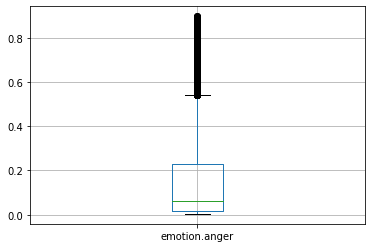

In [14]:
anger_plot = merged_posneg_focus.boxplot(column='emotion.anger', return_type='axes')

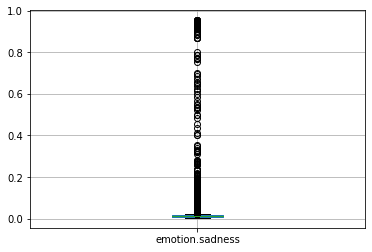

In [15]:
sad_plot = merged_posneg_focus.boxplot(column='emotion.sadness', return_type='axes')

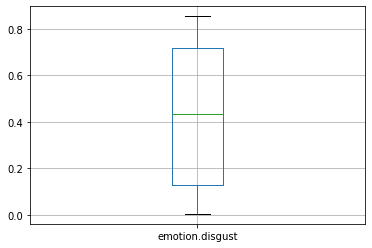

In [16]:
disgust_plot = merged_posneg_focus.boxplot(column='emotion.disgust', return_type='axes')

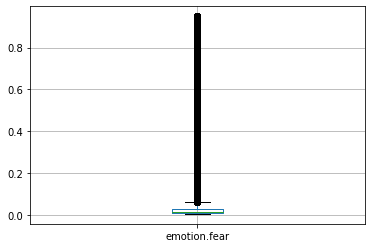

In [17]:
fear_plot = merged_posneg_focus.boxplot(column='emotion.fear', return_type='axes')

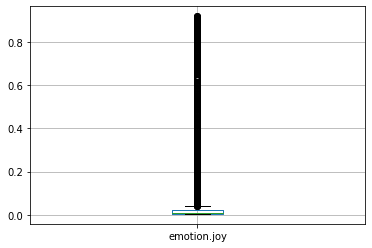

In [18]:
joy_plot = merged_posneg_focus.boxplot(column='emotion.joy', return_type='axes')